In [1]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('banking.csv', 'customer'),
    # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Swami@3190',
    database='banking_case'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/DATA ANALYSIS/portfolio project/Banking'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing banking.csv
NaN values before replacement:
Client ID                   0
Name                        0
Age                         0
Location ID                 0
Joined Bank                 0
Banking Contact             0
Nationality                 0
Occupation                  0
Fee Structure               0
Loyalty Classification      0
Estimated Income            0
Superannuation Savings      0
Amount of Credit Cards      0
Credit Card Balance         0
Bank Loans                  0
Bank Deposits               0
Checking Accounts           0
Saving Accounts             0
Foreign Currency Account    0
Business Lending            0
Properties Owned            0
Risk Weighting              0
BRId                        0
GenderId                    0
IAId                        0
dtype: int64



# CHECKING DATA DETAILS

In [2]:
print (df)

     Client_ID              Name  Age  Location_ID Joined_Bank  \
0     IND81288     Raymond Mills   24        34324  06-05-2019   
1     IND65833     Julia Spencer   23        42205  10-12-2001   
2     IND47499    Stephen Murray   27         7314  25-01-2010   
3     IND72498    Virginia Garza   40        34594  28-03-2019   
4     IND60181   Melissa Sanders   46        41269  20-07-2012   
...        ...               ...  ...          ...         ...   
2995  IND66827         Earl Hall   82         8760  09-10-2014   
2996  IND40556  Billy Williamson   44        32837  05-02-2009   
2997  IND72414      Victor Black   70        36088  29-12-2009   
2998  IND46652       Andrew Ford   56        24871  13-02-2006   
2999  IND40216        Amy Nguyen   79        38518  08-12-2005   

          Banking_Contact Nationality                     Occupation  \
0          Anthony Torres    American           Safety Technician IV   
1        Jonathan Hawkins     African            Software Consu

In [3]:
df.head(5)

,Client_ID,Name,Age,Location_ID,Joined_Bank,Banking_Contact,Nationality,Occupation,Fee_Structure,Loyalty_Classification,...,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [5]:
df.tail(5)

,Client_ID,Name,Age,Location_ID,Joined_Bank,Banking_Contact,Nationality,Occupation,Fee_Structure,Loyalty_Classification,...,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId
2995,IND66827,Earl Hall,82,8760,09-10-2014,Joshua Bennett,American,Accounting Assistant III,High,Gold,...,1089957.03,532867.88,657849.62,12947.31,1238859.91,1,3,3,2,4
2996,IND40556,Billy Williamson,44,32837,05-02-2009,Dennis Ruiz,European,Paralegal,Mid,Gold,...,136891.32,56581.74,93195.61,23205.69,277171.07,1,2,3,2,5
2997,IND72414,Victor Black,70,36088,29-12-2009,Joshua Ryan,American,Statistician IV,Low,Jade,...,214860.89,158726.06,35539.15,30291.81,502947.22,2,2,3,2,6
2998,IND46652,Andrew Ford,56,24871,13-02-2006,Nicholas Cunningham,European,Human Resources Assistant III,Mid,Jade,...,742630.22,404638.26,56411.33,6413.14,1538368.60,3,1,3,2,7
2999,IND40216,Amy Nguyen,79,38518,08-12-2005,Joe Hanson,American,Biostatistician III,High,Jade,...,65617.66,77769.08,32371.38,8992.36,329412.55,1,1,3,2,8


# GETTING DATA INFORMATION, DATA TYPES

In [10]:
df.shape

(3000, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client_ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location_ID               3000 non-null   int64  
 4   Joined_Bank               3000 non-null   object 
 5   Banking_Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee_Structure             3000 non-null   object 
 9   Loyalty_Classification    3000 non-null   object 
 10  Estimated_Income          3000 non-null   float64
 11  Superannuation_Savings    3000 non-null   float64
 12  Amount_of_Credit_Cards    3000 non-null   int64  
 13  Credit_Card_Balance       3000 non-null   float64
 14  Bank_Loa

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generating descriptive statistics for the dataframe

In [11]:
df.describe()

,Age,Location_ID,Estimated_Income,Superannuation_Savings,Amount_of_Credit_Cards,Credit_Card_Balance,Bank_Loans,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


# Starting EDA part

In [19]:
bins = [0,100000,300000,float('inf')]
labels = ['Low', 'Medium', 'High']

df['Income Band'] = pd.cut(df['Estimated_Income'], bins = bins, labels = labels, right = False)

In [20]:
df['Income Band'].value_counts()

Income Band
Medium    1517
Low       1027
High       456
Name: count, dtype: int64

<Axes: xlabel='Income Band'>

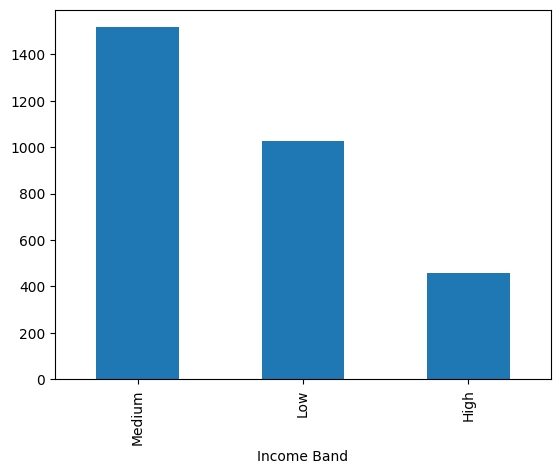

In [23]:
df['Income Band'].value_counts().plot(kind='bar')

# Examine the distribution of unique categories in categorical columns

In [26]:
categorical_cols = df[["BRId", "GenderId", "IAId", "Amount_of_Credit_Cards", "Nationality", "Occupation", "Fee_Structure", "Loyalty_Classification", "Properties_Owned", "Risk_Weighting", "Income Band"]].columns

for col in categorical_cols:
  print(f"Value Counts for '{col}':")
  display(df[col].value_counts())

Value Counts for 'BRId':


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value Counts for 'GenderId':


GenderId
2    1512
1    1488
Name: count, dtype: int64

Value Counts for 'IAId':


IAId
1     177
2     177
3     177
4     177
8     177
9     176
13    176
12    176
10    176
11    176
14    176
15    176
6      89
5      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value Counts for 'Amount_of_Credit_Cards':


Amount_of_Credit_Cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value Counts for 'Nationality':


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Counts for 'Occupation':


Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value Counts for 'Fee_Structure':


Fee_Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value Counts for 'Loyalty_Classification':


Loyalty_Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value Counts for 'Properties_Owned':


Properties_Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value Counts for 'Risk_Weighting':


Risk_Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value Counts for 'Income Band':


Income Band
Medium    1517
Low       1027
High       456
Name: count, dtype: int64

# Univariate Analysis

C:\Users\Akashay Kulkarni.LAPTOP-H4E1K5K0\AppData\Local\Temp\ipykernel_7612\3543189325.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=predictor,palette=palette)
C:\Users\Akashay Kulkarni.LAPTOP-H4E1K5K0\AppData\Local\Temp\ipykernel_7612\3543189325.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=predictor,palette=palette)
C:\Users\Akashay Kulkarni.LAPTOP-H4E1K5K0\AppData\Local\Temp\ipykernel_7612\3543189325.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=predictor,palette=palette)
C:\Users\A

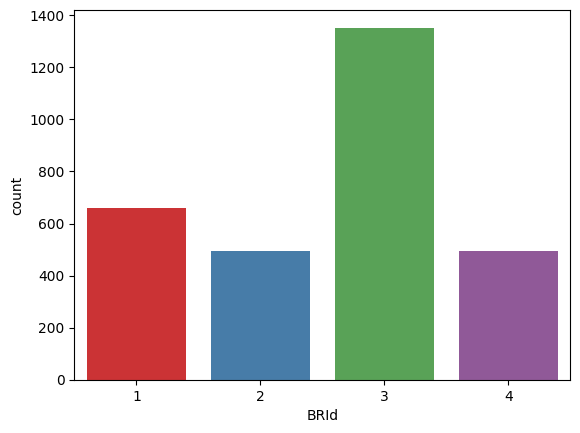

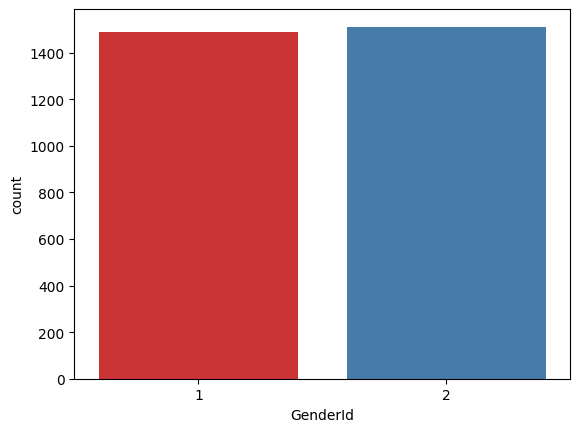

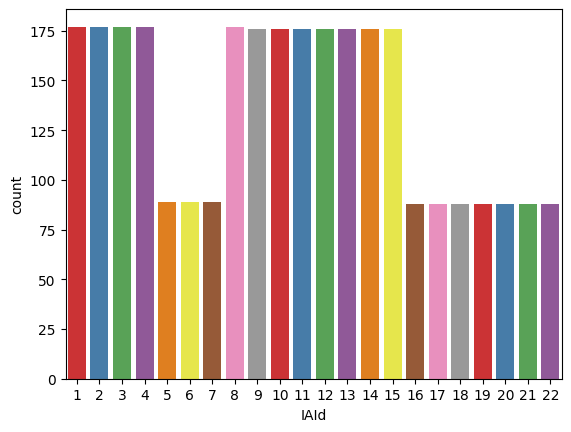

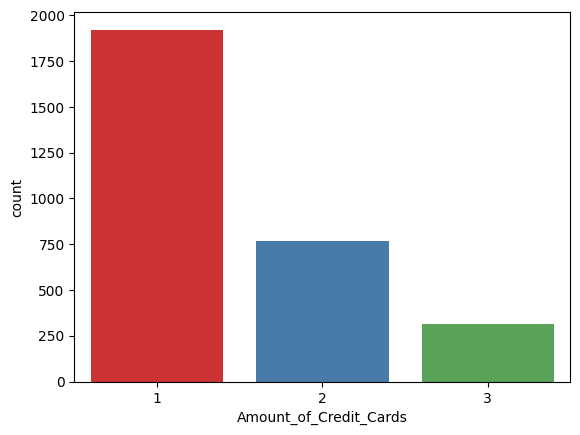

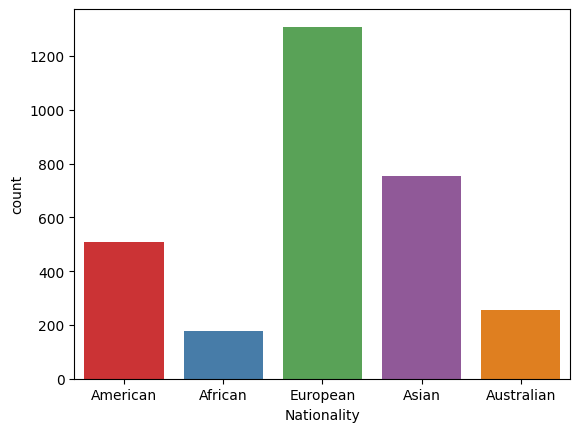

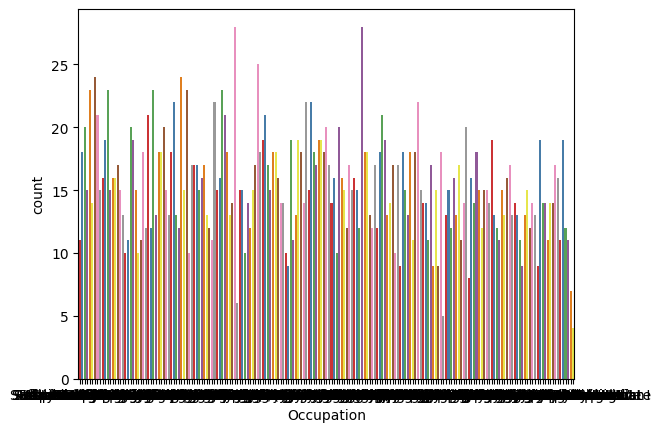

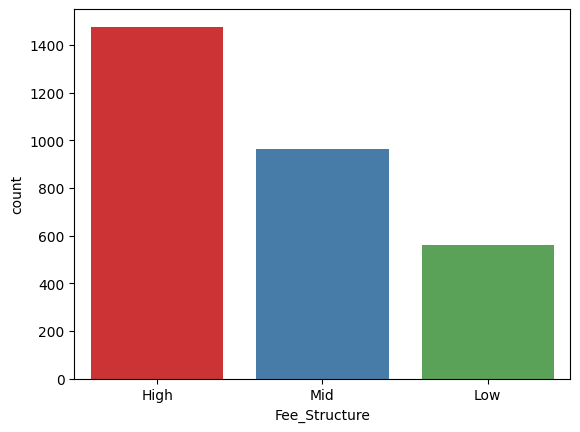

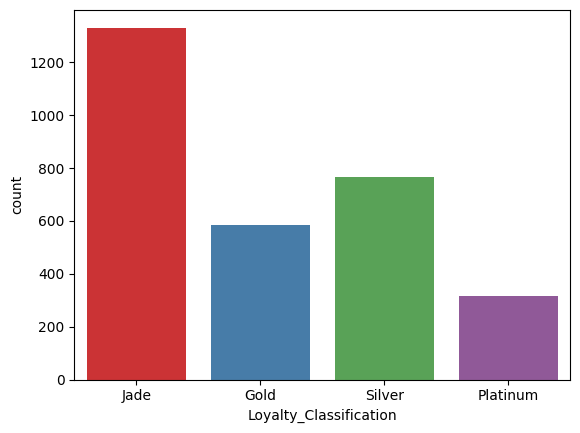

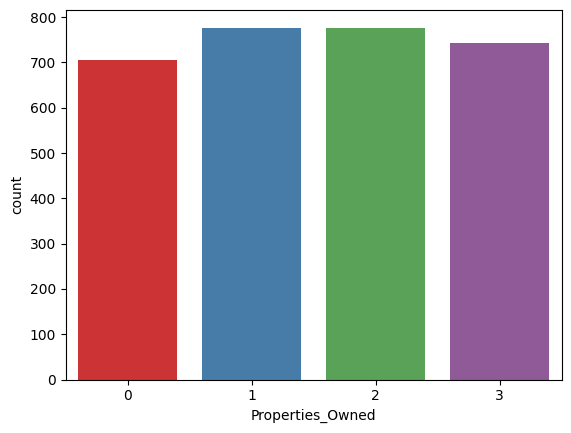

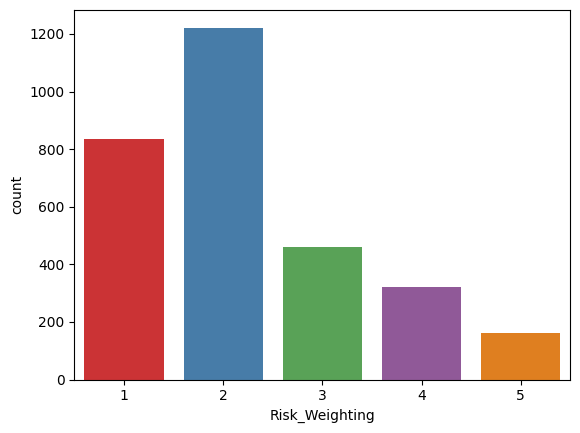

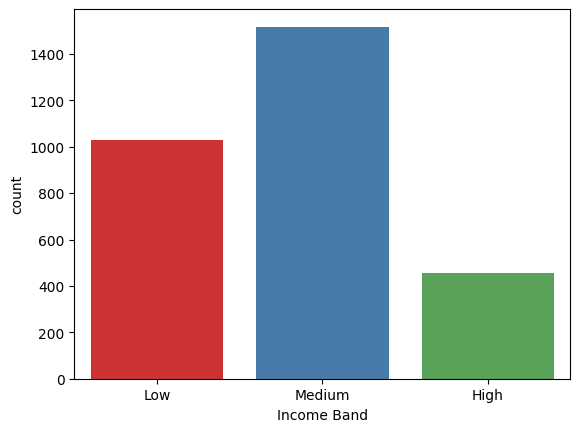

In [40]:
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount_of_Credit_Cards", "Nationality", "Occupation", "Fee_Structure", "Loyalty_Classification", "Properties_Owned", "Risk_Weighting", "Income Band"]].columns):
    plt.figure(i)
    unique_categories = df[predictor].dropna().unique()
    palette = sns.color_palette("Set1", len(unique_categories))
    sns.countplot(data=df, x=predictor,palette=palette)

# Byvariate Analysis

C:\Users\Akashay Kulkarni.LAPTOP-H4E1K5K0\AppData\Local\Temp\ipykernel_7612\240125084.py:3: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=predictor,palette=palette, hue='Nationality')
C:\Users\Akashay Kulkarni.LAPTOP-H4E1K5K0\AppData\Local\Temp\ipykernel_7612\240125084.py:3: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=predictor,palette=palette, hue='Nationality')
C:\Users\Akashay Kulkarni.LAPTOP-H4E1K5K0\AppData\Local\Temp\ipykernel_7612\240125084.py:3: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=predictor,palette=palette, hue='Nationality')
C:\Users\Akashay Kulkarni.LAPTOP-H4E1K5K0\AppData\Local\Temp\ipykernel_7612\240125084.py:3: UserWarning: 
The palette list h

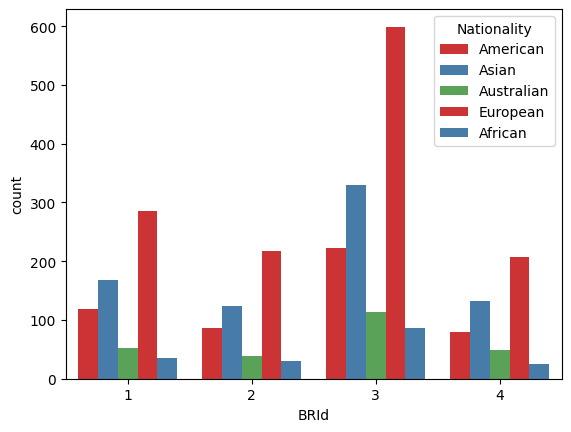

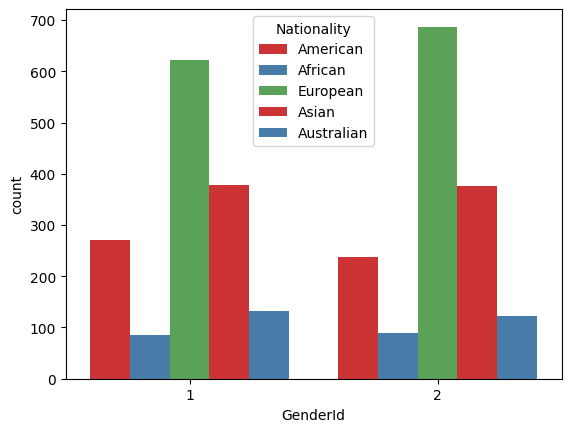

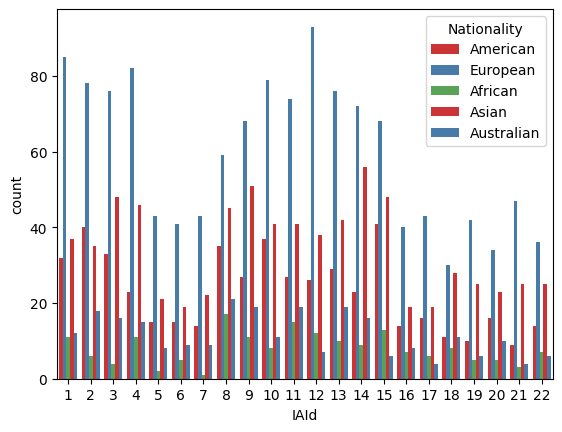

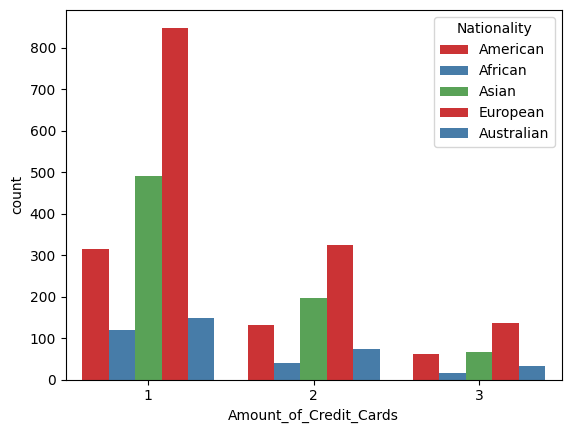

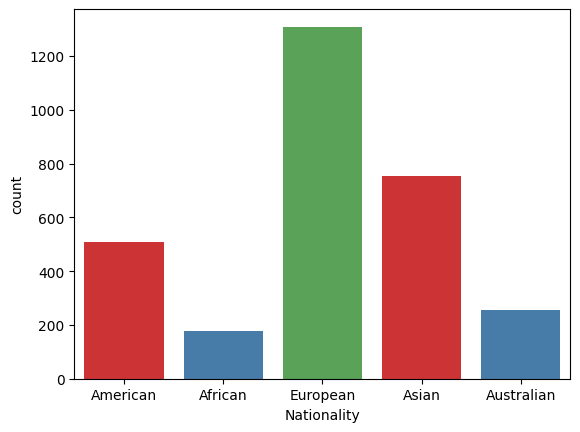

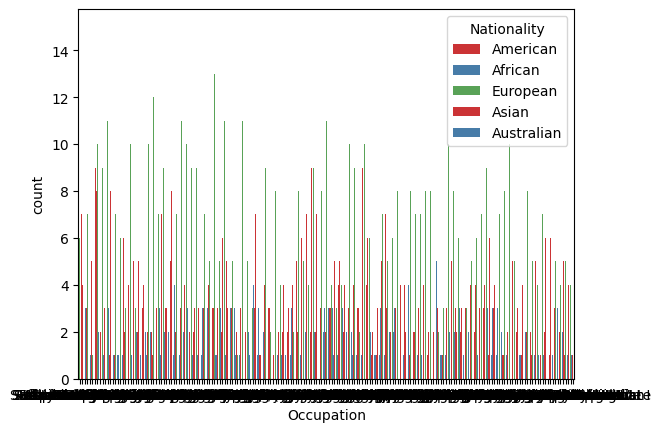

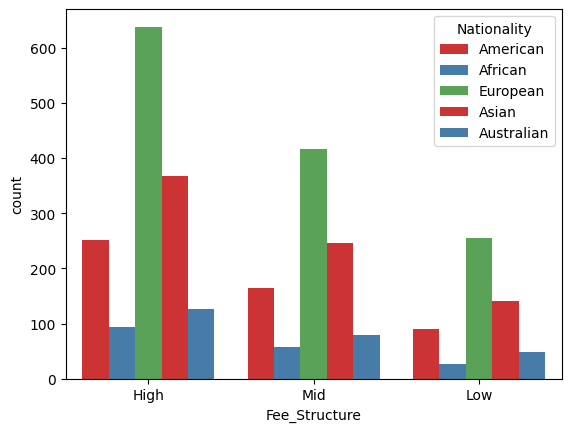

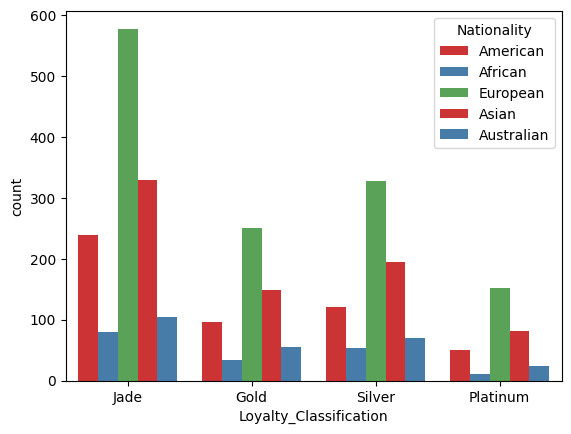

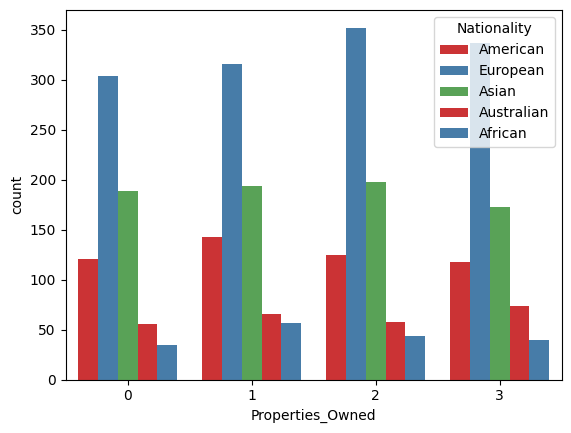

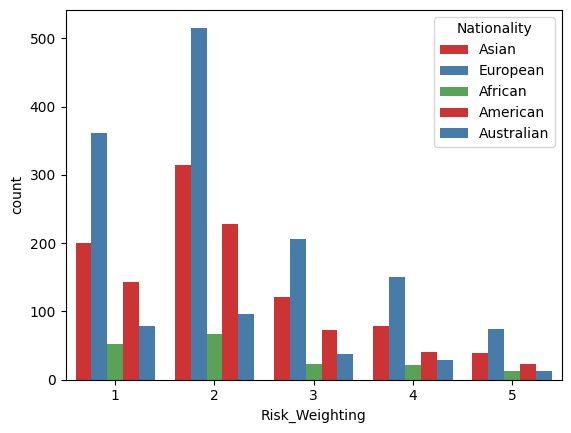

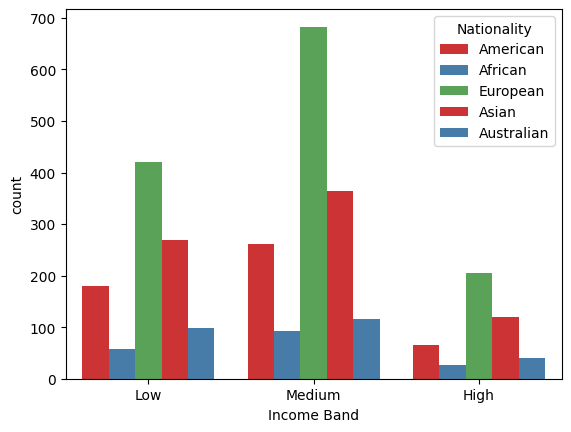

In [42]:
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount_of_Credit_Cards", "Nationality", "Occupation", "Fee_Structure", "Loyalty_Classification", "Properties_Owned", "Risk_Weighting", "Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor,palette=palette, hue='Nationality')

# Histogram plot of value counts for different occupation

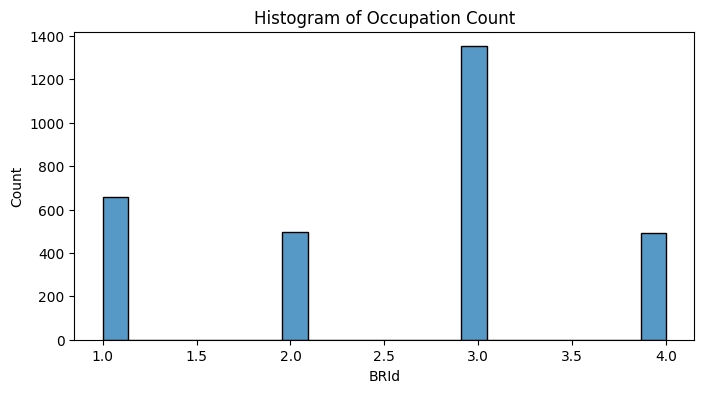

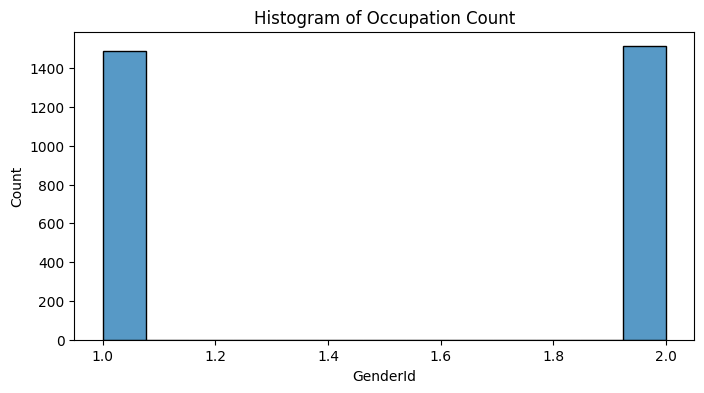

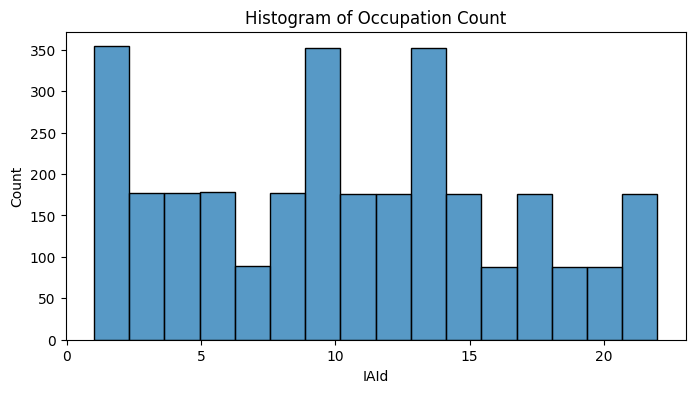

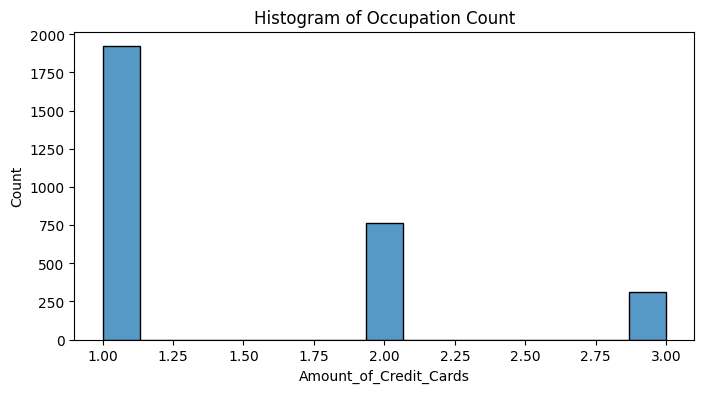

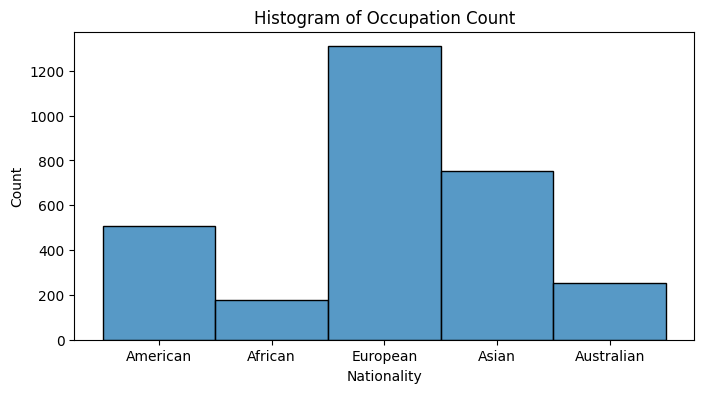

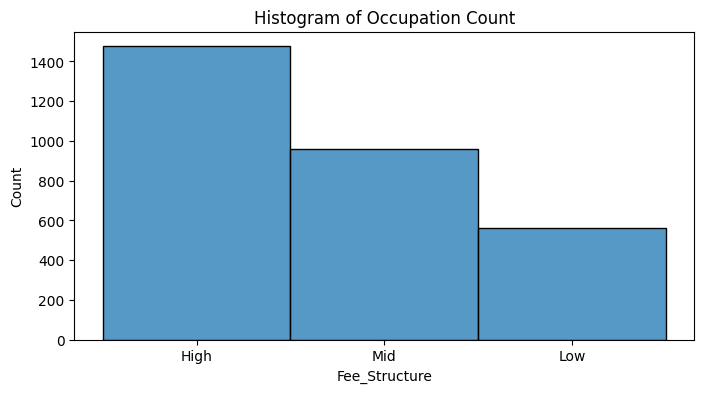

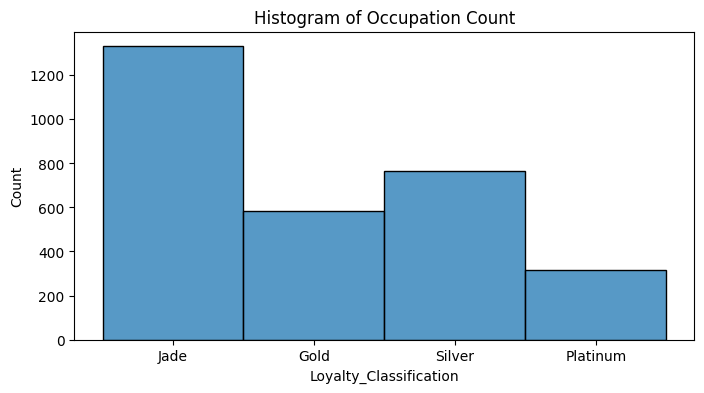

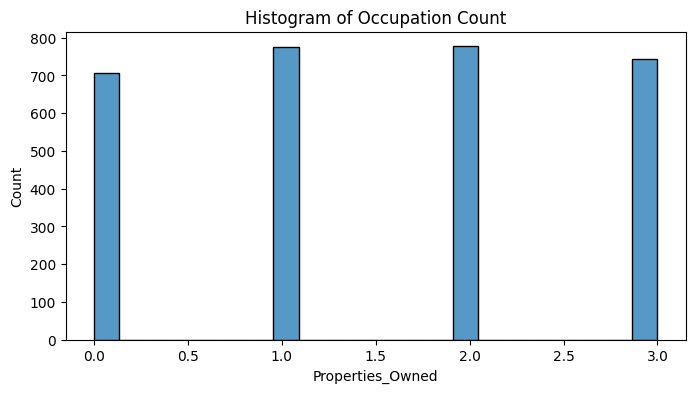

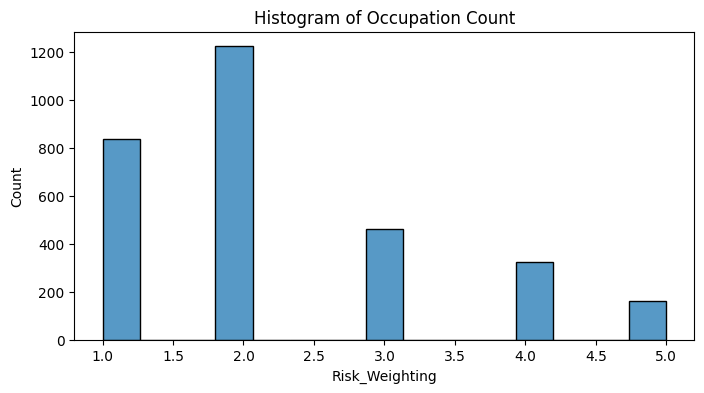

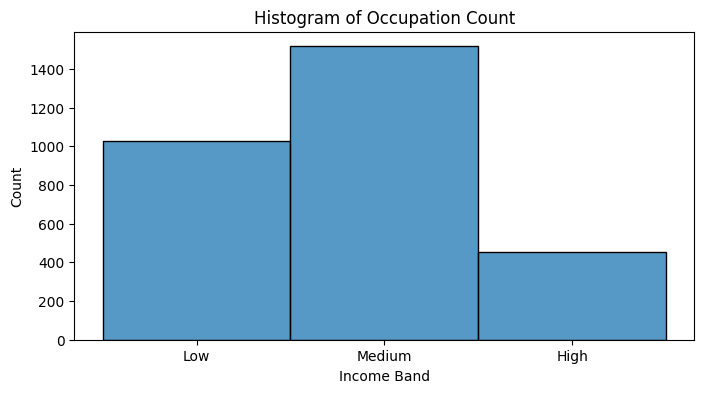

In [46]:
for col in categorical_cols:
     if col == "Occupation":
         continue
     plt.figure(figsize=(8,4))
     sns.histplot(df[col])
     plt.title('Histogram of Occupation Count')
     plt.xlabel(col)
     plt.ylabel("Count")
     plt.show()

# Numerical analysis

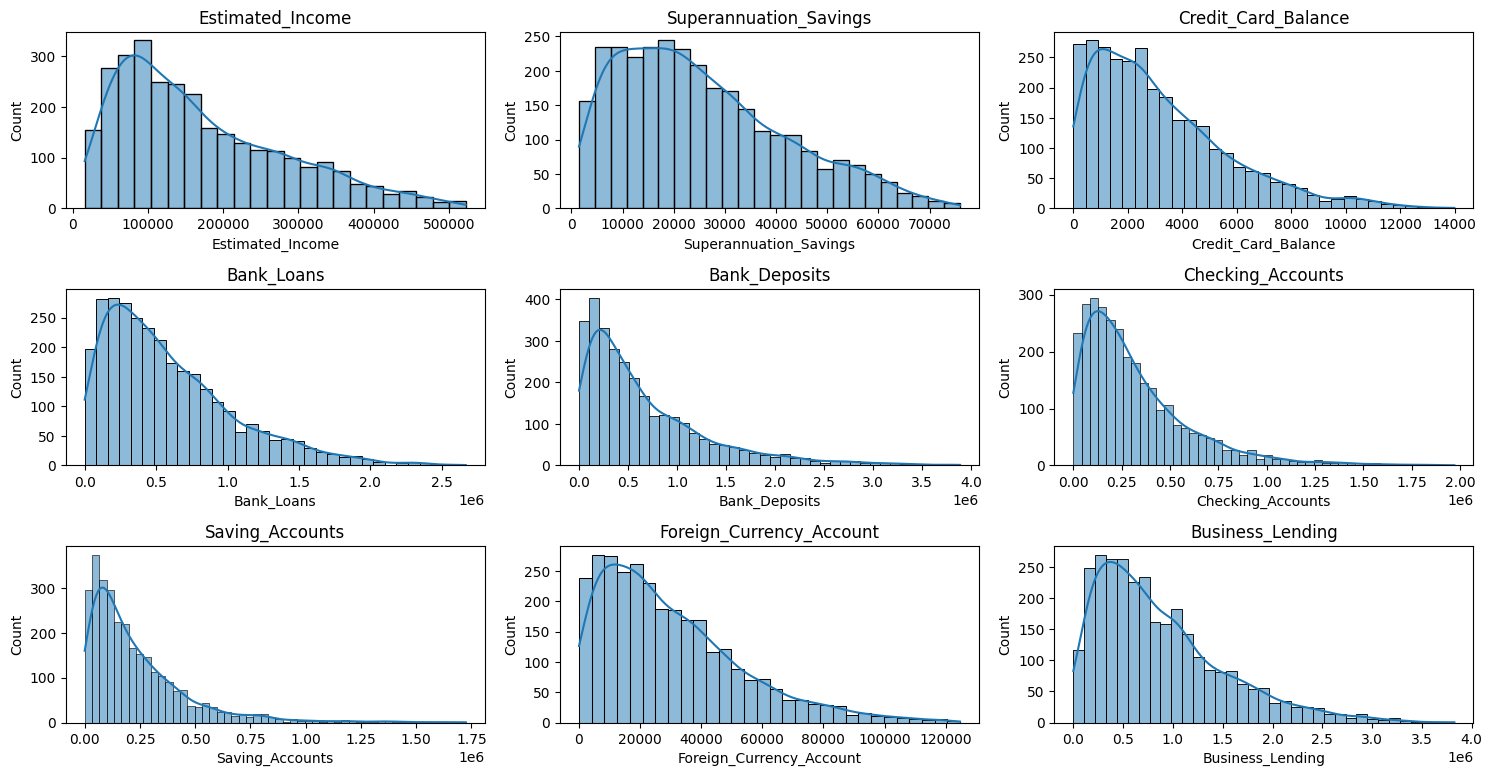

In [65]:
numerical_cols = ['Estimated_Income', 'Superannuation_Savings', 'Credit_Card_Balance', 'Bank_Loans', 'Bank_Deposits', 'Checking_Accounts', 'Saving_Accounts', 'Foreign_Currency_Account', 'Business_Lending']

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col],kde = True)
    plt.title(col)

plt.tight_layout()    
plt.show()   
    

           

# Finding out Correlation matrix

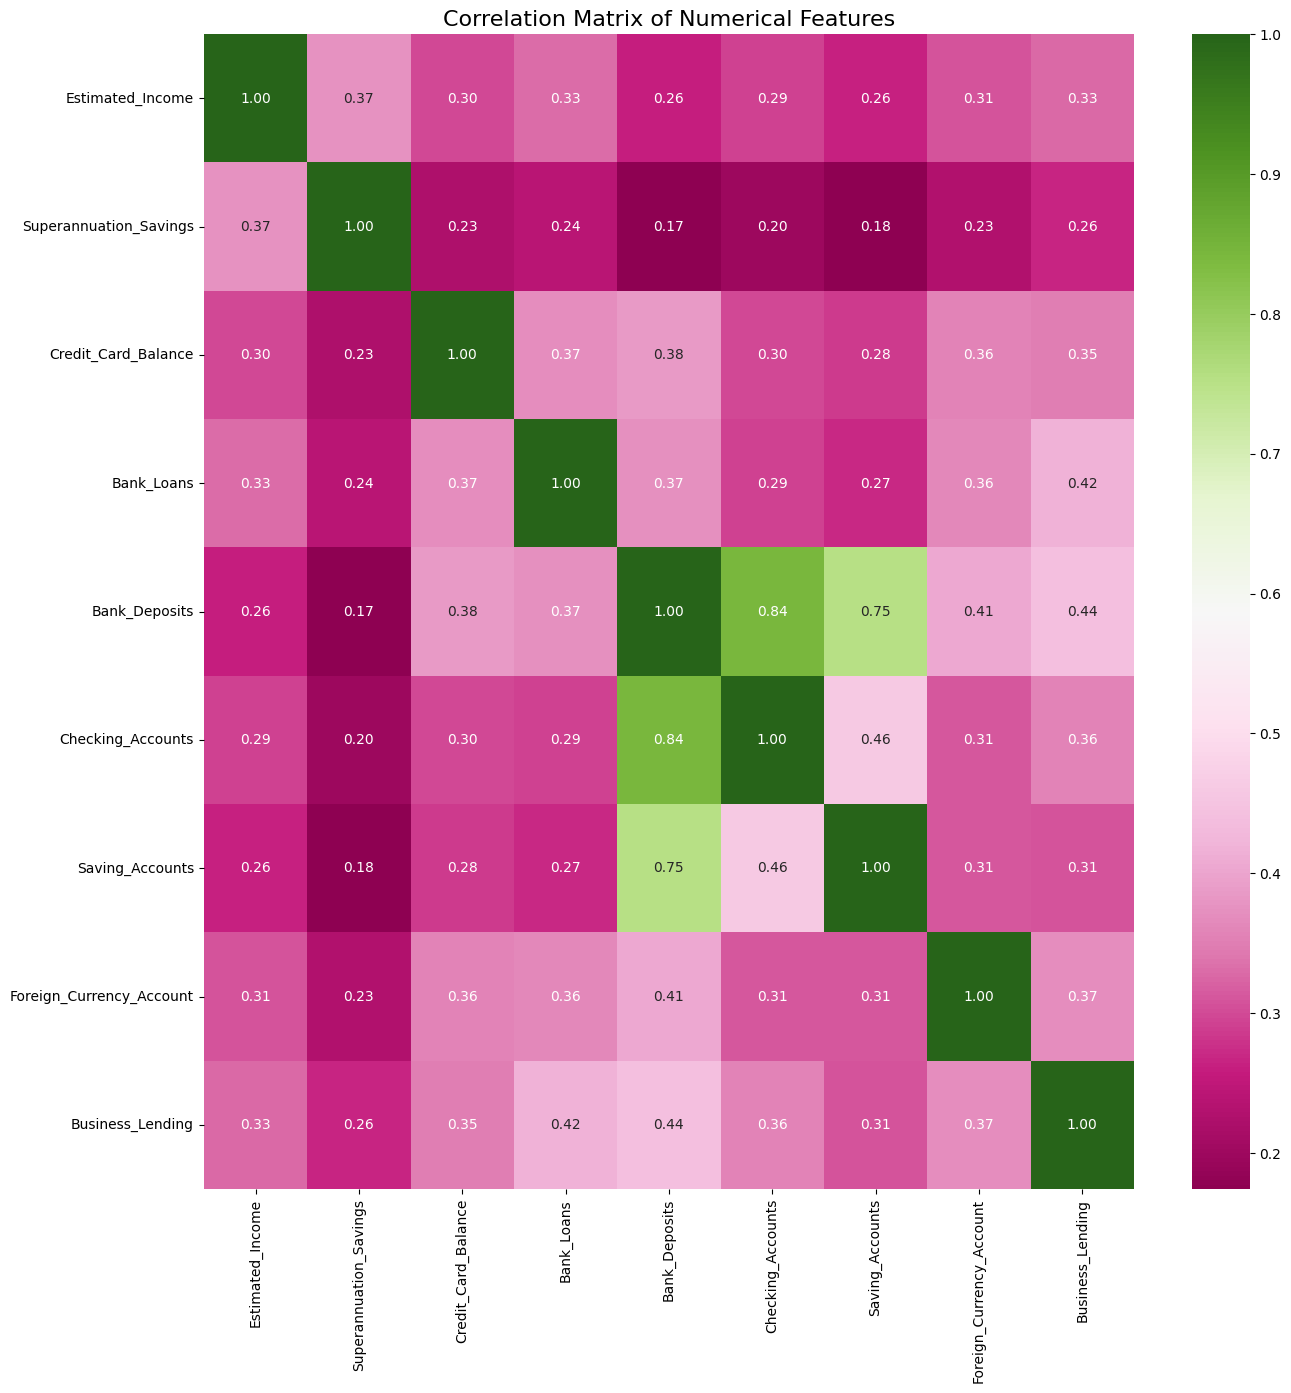

In [74]:
numerical_cols = ['Estimated_Income', 'Superannuation_Savings', 'Credit_Card_Balance', 'Bank_Loans', 'Bank_Deposits', 'Checking_Accounts', 'Saving_Accounts', 'Foreign_Currency_Account', 'Business_Lending']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot = True, cmap = 'PiYG', fmt = ".2f")
plt.title("Correlation Matrix of Numerical Features", fontsize=16)

plt.show()   